In [1]:
#Import dependencies 
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import json
import requests

In [2]:
#Read the csv files
olympics_df = pd.read_csv('Resources/athlete_events.csv')
host_cities_df = pd.read_csv('Resources/olym.csv')
arrivals_df = pd.read_csv('Resources/INT.ARVL.csv')
departures_df = pd.read_csv('Resources/INT.DPRT.csv')
expenditures_df = pd.read_csv('Resources/INT.XPND.csv')

In [3]:
#Jumaan start here (Question 1)

How does hosting the olympics affect tourism for the host country in terms of international visitors and total expenditures?

In [4]:
#Get the rows for the last 6 cities that hosted olympics
filtered_data = host_cities_df.iloc[45:]

#Get rid of unnecessary columns
last_six_hosts = filtered_data[['City', 'Country', 'Year']]

In [5]:
#Rename country in arrivals dataset if different from host cities dataset
arrivals_df = arrivals_df.replace('Russian Federation', 'Russia')

#Rename column to allow merging
arrivals_df = arrivals_df.rename(columns={'Country Name': 'Country'})

In [6]:
#Merge Datasets
combined_df = last_six_hosts.merge(arrivals_df, on='Country', how='left')

#Get rid of unnecessary columns
combined_df = combined_df.drop(['Country Code', 'Indicator Name', 'Indicator Code'], axis=1)

#Drop NaN columns
combined_df = combined_df.dropna(axis=1)

In [7]:
#Create a function that calculates percent change
def percent_change(value_1, value_2):
    return (value_2 - value_1)/value_1 * 100

#Create a new data frame that holds the host countries and the arrival data for the year prior to hosting and the year they hosted
arrival_change_df = pd.DataFrame({
    'Country': combined_df['Country'],
    'Host Year': combined_df['Year'],
    'Arrivals before Host Year': '',
    'Arrivals on Host Year': '',
    'Percent Change': ''
    
})

arrival_data_prior_host_year = [combined_df.iloc[0, 13], combined_df.iloc[1, 15], combined_df.iloc[2, 17], \
                            combined_df.iloc[3, 19], combined_df.iloc[4, 21], combined_df.iloc[5, 23]]

arrival_data_on_host_year = [combined_df.iloc[0, 14], combined_df.iloc[1, 16], combined_df.iloc[2, 18], \
                            combined_df.iloc[3, 20], combined_df.iloc[4, 22], combined_df.iloc[5, 24]]

arrival_change_df['Arrivals before Host Year'] = arrival_data_prior_host_year

arrival_change_df['Arrivals on Host Year'] = arrival_data_on_host_year

arrival_change_df['Percent Change'] = percent_change(arrival_change_df['Arrivals before Host Year'], arrival_change_df['Arrivals on Host Year'])

arrival_change_df

,Country,Host Year,Arrivals before Host Year,Arrivals on Host Year,Percent Change
0,Italy,2006,36513000.0,41058000.0,12.447621
1,China,2008,54720000.0,53049000.0,-3.053728
2,Canada,2010,15737000.0,16219000.0,3.062846
3,United Kingdom,2012,29306000.0,29282000.0,-0.081894
4,Russia,2014,30792000.0,32421000.0,5.290335
5,Brazil,2016,6306000.0,6547000.0,3.821757


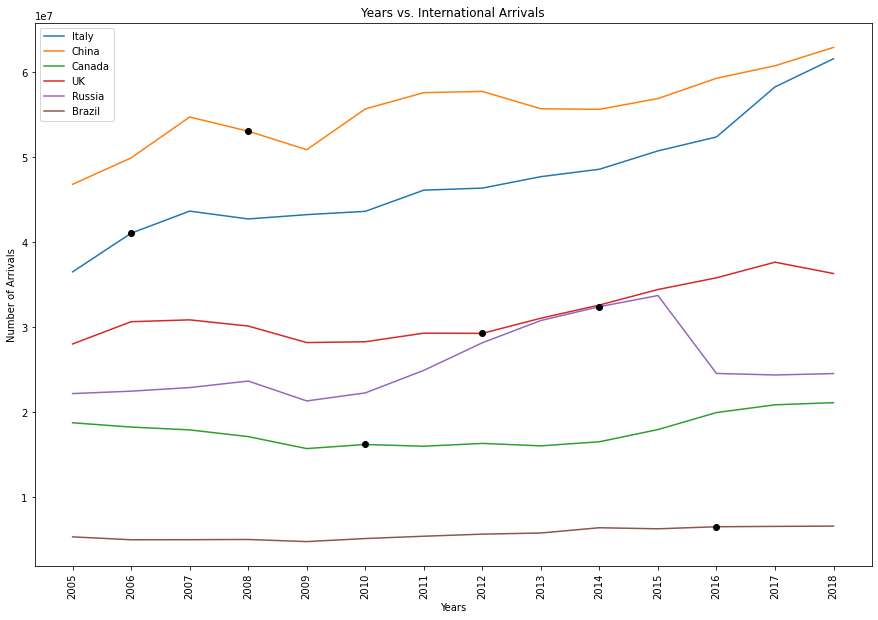

In [8]:
#Line graph for Arrivals

#x-axis
list_of_years = [int(i) for i in combined_df.iloc[:,13:].columns.tolist()]

#y-axis
italy_arrivals = combined_df.iloc[0,13:]
china_arrivals = combined_df.iloc[1,13:]
canada_arrivals = combined_df.iloc[2,13:]
uk_arrivals = combined_df.iloc[3, 13:]
russia_arrivals = combined_df.iloc[4, 13:]
brazil_arrivals = combined_df.iloc[5, 13:]

#set figure size
plt.figure(figsize=(15, 10))

#plots
plt.plot(list_of_years,italy_arrivals,label='Italy')
plt.plot(list_of_years,china_arrivals,label='China')
plt.plot(list_of_years,canada_arrivals,label='Canada')
plt.plot(list_of_years,uk_arrivals,label='UK')
plt.plot(list_of_years,russia_arrivals,label='Russia')
plt.plot(list_of_years,brazil_arrivals,label='Brazil')

#highlight the hosted year point
plt.plot(list_of_years[1], italy_arrivals[1], 'ko')
plt.plot(list_of_years[3],china_arrivals[3], 'ko')
plt.plot(list_of_years[5],canada_arrivals[5], 'ko')
plt.plot(list_of_years[7],uk_arrivals[7], 'ko')
plt.plot(list_of_years[9],russia_arrivals[9], 'ko')
plt.plot(list_of_years[11],brazil_arrivals[11], 'ko')

#formatting
plt.title('Years vs. International Arrivals')
plt.xlabel('Years')
plt.ylabel('Number of Arrivals')
plt.xticks(list_of_years, rotation=90)
plt.legend()

plt.show()

In [9]:
#Rename country in expenditures dataset if different from host cities dataset
expenditures_df = expenditures_df.replace('Russian Federation', 'Russia')

#Rename column to allow merging
expenditures_df = expenditures_df.rename(columns={'Country Name': 'Country'})

In [10]:
#Merge Datasets
combined_df = last_six_hosts.merge(expenditures_df, on='Country', how='left')

#Get rid of unnecessary columns
combined_df = combined_df.drop(['Country Code', 'Indicator Name', 'Indicator Code'], axis=1)

#Drop NaN columns
combined_df = combined_df.dropna(axis=1)

In [13]:
#Create a new data frame that holds the host countries and the expenditures data for the year prior to hosting, the year they hosted and the year after hosting 
expenditure_change_df = pd.DataFrame({
    'Country': combined_df['Country'],
    'Host Year': combined_df['Year'],
    'Expenditures before Host Year': '',
    'Expenditures on Host Year': '',
    'Percent Change': ''
    
})

expenditure_data_prior_host_year = [combined_df.iloc[0, 13], combined_df.iloc[1, 15], combined_df.iloc[2, 17], \
                            combined_df.iloc[3, 19], combined_df.iloc[4, 21], combined_df.iloc[5, 23]]

expenditure_data_on_host_year = [combined_df.iloc[0, 14], combined_df.iloc[1, 16], combined_df.iloc[2, 18], \
                            combined_df.iloc[3, 20], combined_df.iloc[4, 22], combined_df.iloc[5, 24]]

expenditure_change_df['Expenditures before Host Year'] = expenditure_data_prior_host_year

expenditure_change_df['Expenditures on Host Year'] = expenditure_data_on_host_year

expenditure_change_df['Percent Change'] = percent_change(expenditure_change_df['Expenditures before Host Year'], expenditure_change_df['Expenditures on Host Year'])

expenditure_change_df

,Country,Host Year,Expenditures before Host Year,Expenditures on Host Year,Percent Change
0,Italy,2006,2.676400e+10,2.744900e+10,2.559408
1,China,2008,2.978600e+10,3.615700e+10,21.389243
2,Canada,2010,3.022500e+10,3.722500e+10,23.159636
3,United Kingdom,2012,6.060800e+10,6.132300e+10,1.179712
4,Russia,2014,5.950400e+10,5.538300e+10,-6.925585
5,Brazil,2016,2.035600e+10,1.706800e+10,-16.152486


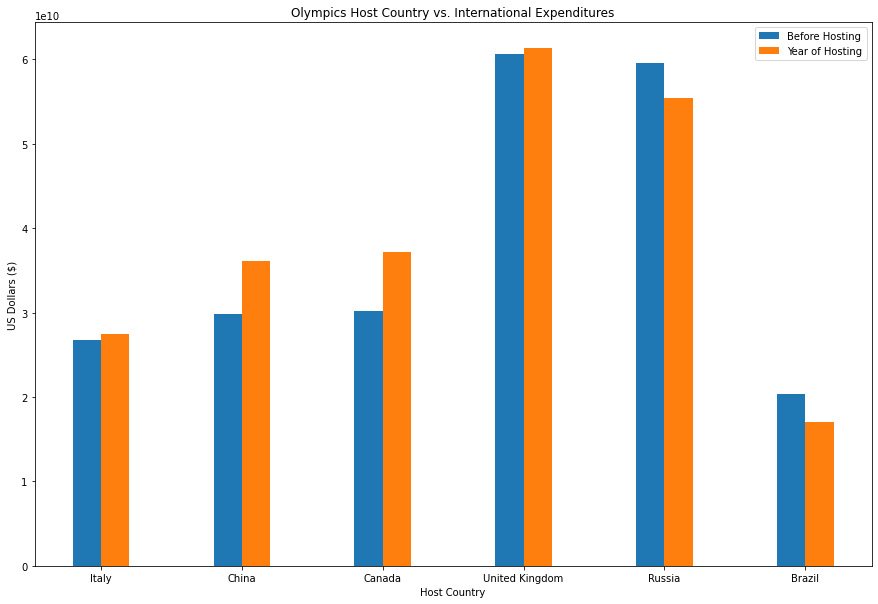

In [16]:
# Extract individual groups
before_host = expenditure_change_df['Expenditures before Host Year']
on_host = expenditure_change_df['Expenditures on Host Year']

# Numbers of pairs of bars
N = 6

# Position of bars on x-axis
position = np.arange(N)

# Figure size
plt.figure(figsize=(15,10))

# Width of a bar 
width = 0.2

# Plotting
plt.bar(position, before_host, width, label='Before Hosting')
plt.bar(position + width, on_host, width, label='Year of Hosting')

plt.xlabel('Host Country')
plt.ylabel('US Dollars ($)')
plt.title('Olympics Host Country vs. International Expenditures')

# xticks()
plt.xticks(position + width/ 2, expenditure_change_df['Country'])

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()

# Question 1 Report

The Olympics is a time of competition and national pride. People around the world arrive at the Olympics to support their nation's athletes throughout many sporting events. While the olympics are catered around its athletic events and fans, it is also very much about business. Host cities invest into the Olympics heavily in hopes of making sizable gains for both the local and national economy through tourism, marketing, etc. In this analysis, we look at the influence of the Olympics on the host country's international arrival data as well as international expenditure data.

Looking at the timeline graph outlining the international arrival data for countries that hosted since 2006, we can see that majority of the countries experienced an uptick in their number of international arrivals on the year they hosted aside from China. China's number of international arrivals dropped by 3% compared to the year before. However, there is much needed context to explain this change. Leading up to the 2008 Summer Olympics, there were numerous concerns regarding human rights violation committed by China during the civil unrest in Tibet that led high-profile politicians and celebrities to boycott the games. Additionally, the level of air pollution in Beijing came under scrutiny due to the hazard it posed to the competing athletes and the general public. The financial crisis of 2007-2008 was also a factor since it was a severe worldwide economic crisis limiting an individual's spending ability.

The international expenditure data, on the other hand, tells us a different story of the macroeconomy during the time of Olympics and the year after. Nations such as Italy, China, Canada, and the United Kingdom experienced an increase in their international expenditures the year they hosted the Olympics as opposed to Russia and Brazil. Russia hosted the Olympics in 2014, a time at which they were experiencing their own financial crisis. Due to the fall in price of oil, a major export of Russia, a sharp devaluation of the Russian ruble took place. Similarily, Brazil also faced an economic crisis in 2015, a year before hosting the Olympics. This occured as a result of a dispute in the legitmacy of the Brazilian elections leading to dissatification with the government by the general public. There were also concerns about the Zika virus that raised fears regarding its potential effect on competing athletes and visitors. 

In [ ]:
#Jumaan end here

In [ ]:
#Timmy start here (Question 2)

In [ ]:
#Timmy end here

In [ ]:
#Raj start here (Question 3)

In [ ]:
#Raj end here

In [ ]:
#Fatma start here (Question 4)

Is there a statistically significant difference between medals won prior to hosting olympics and after hosting?

In [ ]:
# quick look on olympics data
olympics_df.head()

In [ ]:
# look at host cities data
host_cities_df.head()

# Clean up mispelled words in the dataframe

In [ ]:
# get only the city and country column from the host city data
host_cities_df = host_cities_df[["City", "Country"]]
host_cities_df.head()

# find the unique city and country names in the host city data frame, and use them to correct spelling mistakes
z=host_cities_df["City"].unique()
y=host_cities_df["Country"].unique()
z
y

In [ ]:
#replace the west germany and nazi germany with germany and soviet union with russia in the host_cities file

host_cities_df = host_cities_df.replace({'Germnay' : 'Germany', 'West Germany': 'Germany', 'Nazi Germany': 'Germany' , 'Soviet Union' : 'Russia'})

#replace the misspelled city names with the correct ones based on the host cities file

olympics_c_df= olympics_df.replace({'Athina':'Athens', 'Antwerpen':'Antwerp', 'Sankt Moritz':'St. Moritz', 'Roma':'Rome', 'Moskva':'Moscow', 'Torino':'Turin'})

#merge olympics and host cities data

olympics_country_df = pd.merge(olympics_c_df, host_cities_df, how="left", on=["City"])

# remove duplicates from olympics data
olympics_country_df = olympics_country_df.drop_duplicates()

# look at data quickly
olympics_country_df.head()

In [ ]:
# leave only the columns that are relevant to the analysis
olympics_country_df = olympics_country_df[["Name", "Team", "Year", "Season", "Sport", "Event", "Medal", "Country"]]
olympics_country_df.shape

In [ ]:
# check if any NaN is left in the Country column. Shape should be equal to olympics_country_df.if there is no NaN left nothing 
# will drop and the row numbers should stay same.
x = olympics_country_df.dropna(subset=["Country"])
x.shape

# The medal column has NaN for no medal won. Replace all with 0

In [ ]:
# replace all the NaN in the Medal column with 0
values = {"Medal" : 0}
olympics_country_df = olympics_country_df.fillna(value=values)
olympics_country_df = pd.DataFrame(olympics_country_df)
olympics_country_df.head()

# Make a dataframe that shows only teams for the years they hosted and remove any rows when no medal was won

In [ ]:
# Make a new df where the team is from the host country

host_team = olympics_country_df.loc[olympics_country_df["Team"] == olympics_country_df["Country"]]
host_team.head()

In [ ]:
# remove the columns with no medal win

medal_win = host_team.loc[host_team["Medal"] != 0]

# drop any duplicate row if there is any
medal_win = medal_win.dropna()

# keep only columns of interest
medal_win = medal_win[[ "Team", "Year", "Medal"]]

In [ ]:
# how many medals host countries won, do groupby

medal_win_host = medal_win.groupby(["Team", "Year"]).count()
medal_win_host

# reset index 

host_year_medal_count = medal_win_host.reset_index()
host_year_medal_count.head()

In [ ]:
# from my corrected host cities dataframe find the unique countries
host_countries = host_cities_df["Country"].unique()
host_countries


# Make a dataframe that shows all the teams that hosted olympics anytime, remove rows when no medal was won, count the total medal won for that country in that year

In [ ]:
# clean the olympics dataframe only that it has teams that were also hosts at anytime during the olympics

only_teams_that_hosted = olympics_country_df[olympics_country_df["Team"].isin(olympics_country_df["Country"])]
only_teams_that_hosted.head()

In [ ]:
#remove the columns with no medal win

medal_win_by_team = only_teams_that_hosted.loc[only_teams_that_hosted["Medal"] != 0]
medal_win_by_team = medal_win_by_team.dropna()

#this is different from the medal win dataframe in that this one includes all the years the hosting country participated
#keep only relevant columns

medal_win_by_team = medal_win_by_team[["Team", "Year", "Medal"]]

In [ ]:
# group by team and count the medal wins of the team during the entire time (not only when it is host)

year_medal_count = medal_win_by_team.groupby(["Team", "Year"]).count()
year_medal_count.head()


# Make bar graphs showing how many medals each contry won. Color the year of hosting red

In [ ]:
# for loop for each team 

team = only_teams_that_hosted["Team"].unique()
team = team.tolist()
team

for team in team:
    
    teams = year_medal_count.loc[team]
    
    bar = host_year_medal_count.loc[host_year_medal_count["Team"] == team ]["Year"].tolist()
    
    colors = ["red" if x in bar else "yellow" for x in teams.index]
    
    teams.plot.bar(y="Medal", title=f"Olympic medal counts for {team} ", color=colors)
    
    plt.show()
    
    


# Do everything only for summer Olympics

In [ ]:
# get the medal wins only for summer olympics for host teams


summer_wins = host_team.loc[host_team["Medal"] != 0]
summer_wins = summer_wins.dropna()
summer_wins

summer_wins = summer_wins.loc[summer_wins["Season"] == "Summer"]
summer_wins = summer_wins[[ "Team", "Year", "Medal"]]
summer_wins

In [ ]:
# medal counts for teams during hosting
summer_win_host = summer_wins.groupby(["Team", "Year"]).count()
summer_win_host

host_year_medal_count_summer = summer_win_host.reset_index()
host_year_medal_count_summer.head()

In [ ]:
# divide the only teams that hosted dataframe into summer

only_teams_that_hosted_summer = only_teams_that_hosted.loc[only_teams_that_hosted["Season"] == "Summer"]
only_teams_that_hosted_summer.head()

In [ ]:
#remove the columns with no medal win

medal_win_by_team_summer = only_teams_that_hosted_summer.loc[only_teams_that_hosted_summer["Medal"] != 0]
medal_win_by_team_summer= medal_win_by_team_summer.dropna()
medal_win_by_team_summer = medal_win_by_team_summer[["Team", "Year", "Medal"]]

In [ ]:
# group by team and count the medal wins of the team during the entire time (not only when it is host)

year_medal_count_summer = medal_win_by_team_summer.groupby(["Team", "Year"]).count()
year_medal_count_summer.head()

In [ ]:
# for loop for each team 

team = only_teams_that_hosted_summer["Team"].unique()
team = team.tolist()
team

for team in team:
    
    teams = year_medal_count_summer.loc[team]
    
    bar = host_year_medal_count_summer.loc[host_year_medal_count_summer["Team"] == team ]["Year"].tolist()
    
    colors = ["red" if x in bar else "yellow" for x in teams.index]
    
    teams.plot.bar(y="Medal", title=f"Olympic medal counts for {team} ", color=colors)
    
    plt.show()
    


# Calculate Ttest for checking the null hypothesis that states "The mean medal win for a country before and after hosting the Olympics is NOT different"

In [ ]:
# create a list of dataframes that will show the country, year they played and medals they won
# first remove all countries that hosted for more than ones. 

j =year_medal_count_summer.reset_index()
t= host_year_medal_count_summer


t["Team"].value_counts() == 1
r = t.drop_duplicates(subset = "Team", keep=False)
r

# make a list that contains these countries
team_summer = r["Team"].tolist()

In [ ]:
# now make a for loop that will show the country and medal wins the years after they hosted.
team_list_after = []

for team in team_summer:
    
    df = j.loc[(j["Team"] == team) & (j["Year"] > r[r['Team']==team]['Year'].values[0])]
    team_list_after.append(df)
    
    
    
team_list_after[0]

In [ ]:
# now make a for loop that will show the country and medal wins the years before they hosted.


team_list_before = []

for team in team_summer:
    
    df = j.loc[(j["Team"] == team) & (j["Year"] < r[r['Team']==team]['Year'].values[0])]
    team_list_before.append(df)
    
    
    
team_list_before[0]["Medal"]

In [ ]:
# calculate t test for each country data obtained from the for loops above
#make a for loop for each team

teams = []
for i in range(len(team_list_after)):

    test = stats.ttest_ind(team_list_after[i].Medal, team_list_before[i].Medal, equal_var=False)
    teamss = team_list_after[i]["Team"].unique().tolist()
    teams.append(teamss)
    
    print(f"Ttest result for {teams[i]}: {test}")

# We were able to reject our null hypothesis for Belgium, Canada, China, Finland, Germany,Japan, Netherlands, South Korea and Spain. 
# We failed to reject the null hypothesis for Italy and Mexico.
# We did not have enough data to perform the test on Brazil.

In [ ]:
#Fatma end here